[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ourownstory/neural_prophet/blob/master/example_notebooks/autoregression_yosemite_temps.ipynb)

# TemporalFusionTransformer

This is a TemporalFusionTransformer model module usage example. We implemented this model under the same API as NeuralProphet, for easy comparison of the results of NeuralProphet and SOTA models.

We used as the base the implementation of TemporalFusionTransformer from Pytorch Forecasting library. The model parameters are inherited automatically from the dataset structure, if from_dataset is set to True.

For more detail on hyperparameters, please follow https://github.com/jdb78/pytorch-forecasting/blob/master/pytorch_forecasting/models/nbeats/__init__.py

In [ ]:
# install NeuralProphet from our repository
!pip install git+https://github.com/adasegroup/neural_prophet.git # may take a while

In [15]:
from neuralprophet.forecaster_additional_models import TemporalFusionTransformerNP
import pandas as pd

In [16]:
if 'google.colab' in str(get_ipython()):
    data_location = "https://raw.githubusercontent.com/adasegroup/neural_prophet/master/"
else:
    data_location = "../"

df = pd.read_csv(data_location + "example_data/yosemite_temps.csv")
df.head(3)
freq = '5min'

df = df.iloc[:1000]

In [48]:
tft = TemporalFusionTransformerNP(
    epochs=10,
    learning_rate=0.03,
    hidden_size=16,
    attention_head_size=1,
    dropout=0.1,
    hidden_continuous_size=8,
    loss_func='QuantileLoss',
)

In [49]:
tft.fit(df, freq = freq)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:68: UserWarning: you defined a validation_step but have no val_dataloader. Skipping validation loop
  warnings.warn(*args, **kwargs)


   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restored states from the checkpoint file at /content/lr_find_temp_model.ckpt

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 96    
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.8 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  

Training: 7it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]


   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 0     
3  | prescalers                         | ModuleDict                      | 96    
4  | static_variable_selection          | VariableSelectionNetwork        | 1.7 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 1.8 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 1.2 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm   | GatedResidualNetwork            | 1.1 

Training: 22it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

,SmoothL1Loss,MAE,MSE,SmoothL1Loss_val,MAE_val,MSE_val
0,11.055040,11.540805,258.596752,11.546592,12.021035,279.756316
1,8.736950,9.220489,172.397068,11.125987,11.618145,226.618106
2,8.968744,9.454658,165.584519,11.225336,11.701333,259.912003
3,8.758811,9.244832,161.296573,11.434234,11.905320,274.905860
4,8.625208,9.108035,164.370099,10.887161,11.353670,246.496048
5,7.374050,7.851276,117.679642,9.654190,10.151484,158.053594
6,5.149583,5.624018,66.559114,10.217548,10.713832,164.371609
7,4.082192,4.548548,46.972037,5.941924,6.395399,101.703074
8,3.416525,3.867664,39.620972,4.997532,5.469887,71.626633
9,2.921703,3.365974,33.260820,3.921445,4.368372,61.738139


In [50]:
future = tft.make_future_dataframe(df, freq, periods=10, n_historic_predictions=10)

In [51]:
forecast = tft.predict(future)

In [52]:
forecast.iloc[-15:]

,ds,y,yhat1,residual1
65,2017-05-04 10:55:00,8.3,8.27405,-0.0259474
66,2017-05-04 11:00:00,8.2,8.01033,-0.189671
67,2017-05-04 11:05:00,8.2,7.7756,-0.424405
68,2017-05-04 11:10:00,8.2,7.63072,-0.569282
69,2017-05-04 11:15:00,8.1,7.54546,-0.554535
70,2017-05-04 11:20:00,NaN,7.48945,NaN
71,2017-05-04 11:25:00,NaN,7.4471,NaN
72,2017-05-04 11:30:00,NaN,7.41163,NaN
73,2017-05-04 11:35:00,NaN,7.38017,NaN
74,2017-05-04 11:40:00,NaN,7.35151,NaN


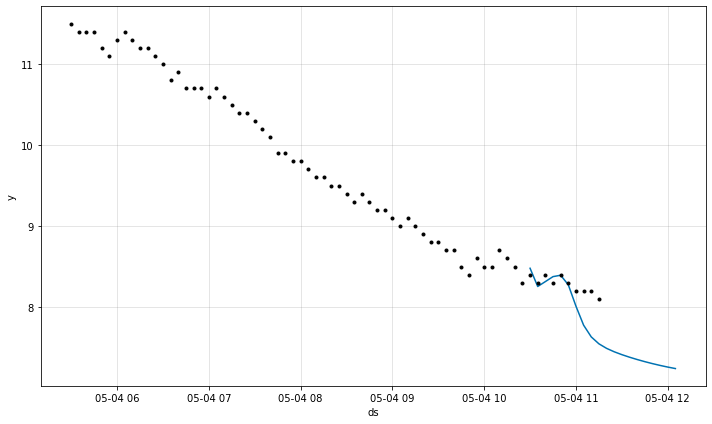

In [53]:
f = tft.plot(forecast)